# Basic UBI reform

This implements a basic $100 UBI. Among other things, it demonstrates that the bottom decile's negative after-tax income leads to this UBI creating a sharp *negative* percent change to after-tax income.

*taxcalc version: 0.15.0  |  Data: CPS  |  Tax year: 2018  |  Type: Static  |  Author: Max Ghenis  |  Date run: 2018-01-19*

## Imports

In [1]:
import taxcalc as tc
import matplotlib as mpl
import pandas as pd
import numpy as np
from bokeh.io import show, output_notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print tc.__version__

0.15.0


## Setup

Use publicly-available CPS input file.

In [3]:
recs = tc.Records.cps_constructor()

Specify `Calculator` object for static analysis of current-law (TCJA) policy.

In [4]:
pol = tc.Policy()
base_calc = tc.Calculator(policy=pol, records=recs)

You loaded data for 2014.
Tax-Calculator startup automatically extrapolated your data to 2014.


In [5]:
base_calc.advance_to_year(2018)
base_calc.calc_all()

Create non-taxable UBI reform.

In [6]:
ubi_amount = 100
ubi_reform = {2018: {'_UBI_u18': [ubi_amount], 
                     '_UBI_1820': [ubi_amount], 
                     '_UBI_21': [ubi_amount],
                     '_UBI_ecrt': [1.0]}}

Implement reform and check for reform error messages.

In [7]:
pol.implement_reform(ubi_reform)
if pol.reform_errors:
    print(pol.reform_errors)
    exit(1)

## Calculate

Specify Calculator object for static analysis of reform policy.

In [8]:
ubi_calc = tc.Calculator(policy=pol, records=recs)
ubi_calc.advance_to_year(2018)
ubi_calc.calc_all()

You loaded data for 2014.
Tax-Calculator startup automatically extrapolated your data to 2014.


## Results

Generate diagnostic and distribution tables.

In [9]:
base_calc.diagnostic_table(1)

,2018
Returns (#m),169.9
AGI ($b),"10,524.2"
Itemizers (#m),27.7
Itemized Deduction ($b),740.6
Standard Deduction Filers (#m),124.1
Standard Deduction ($b),"2,145.2"
Personal Exemption ($b),0.0
Taxable Income ($b),"7,958.7"
Regular Tax ($b),"1,318.4"
AMT Income ($b),"10,008.4"


In [10]:
ubi_calc.diagnostic_table(1)

,2018
Returns (#m),169.9
AGI ($b),"10,524.2"
Itemizers (#m),27.7
Itemized Deduction ($b),740.6
Standard Deduction Filers (#m),124.1
Standard Deduction ($b),"2,145.2"
Personal Exemption ($b),0.0
Taxable Income ($b),"7,958.7"
Regular Tax ($b),"1,318.4"
AMT Income ($b),"10,008.4"


*Errors can be ignored.*

In [11]:
base_dist, ubi_dist = base_calc.distribution_tables(ubi_calc)
base_dist

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ValueError: "Buffer dtype mismatch, expected 'Python object' but got 'long'" in 'pandas._libs.lib.is_bool_array' ignored


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ValueError: "Buffer dtype mismatch, expected 'Python object' but got 'long'" in 'pandas._libs.lib.is_bool_array' ignored


,s006,c00100,num_returns_StandardDed,standard,num_returns_ItemDed,c04470,c04600,c04800,taxbc,c62100,...,c09600,c05800,c07100,othertaxes,refund,iitax,payrolltax,combined,expanded_income,aftertax_income
0,"16,989,417","-3,627,576,815","9,521,078","195,444,215,561","5,828","44,239,584",0,"413,511,978","12,273,093","-3,669,627,645",...,0,"12,273,093","6,541,539",0,"1,749,494,526","-1,743,762,971","2,997,677,501","1,253,914,530","-3,954,421,032","-5,208,335,561"
1,"16,988,286","87,166,220,742","11,733,264","239,932,658,612","28,814","437,764,103",0,"1,452,285,900","52,371,797","86,846,774,444",...,"4,453,204","56,825,001","26,074,982",0,"13,194,877,004","-13,164,126,985","11,263,276,035","-1,900,850,950","167,287,864,037","169,188,714,986"
2,"16,990,004","155,153,469,210","13,113,739","252,315,232,620","303,946","5,797,741,422",0,"25,695,916,485","2,391,176,381","150,438,736,054",...,"16,226,469","2,407,402,849","739,483,266",0,"18,438,212,508","-16,770,292,924","20,539,834,149","3,769,541,225","292,999,652,851","289,230,111,626"
3,"16,989,656","289,412,336,599","15,190,074","269,589,777,528","551,283","10,401,526,637",0,"91,015,452,628","9,004,826,070","281,031,797,290",...,"32,862,777","9,037,688,848","2,769,947,175",0,"22,939,722,229","-16,671,980,556","39,537,213,625","22,865,233,069","429,197,375,240","406,332,142,171"
4,"16,989,955","446,608,860,087","15,681,546","278,455,596,297","911,873","17,957,208,215",0,"198,171,371,421","20,488,841,965","432,457,528,125",...,"70,632,902","20,559,474,866","5,880,160,436",0,"19,061,509,219","-4,382,194,788","61,322,855,071","56,940,660,283","584,466,035,065","527,525,374,783"
5,"16,989,241","644,501,853,799","15,489,544","281,563,394,615","1,401,742","29,209,313,844",0,"355,544,023,377","37,499,167,795","622,319,589,528",...,"91,821,051","37,590,988,846","9,664,324,821",0,"10,541,113,265","17,385,550,759","88,036,773,282","105,422,324,041","780,912,118,379","675,489,794,338"
6,"16,989,686","930,309,462,377","14,421,646","275,024,148,267","2,558,704","56,487,059,476",0,"599,674,744,007","68,816,962,108","888,647,643,142",...,"89,833,799","68,906,795,906","13,965,094,797",0,"3,210,451,694","51,731,249,416","125,989,336,844","177,720,586,260","1,050,930,164,547","873,209,578,287"
7,"16,989,485","1,337,000,323,611","12,726,086","262,439,767,176","4,263,398","100,434,424,036",0,"968,827,409,181","122,473,220,968","1,266,410,406,829",...,"113,477,523","122,586,698,491","18,558,804,957",0,"635,957,139","103,391,936,395","182,710,012,337","286,101,948,733","1,455,732,928,026","1,169,630,979,294"
8,"16,989,613","1,953,272,033,497","9,890,831","221,466,422,843","7,098,783","186,522,521,713",0,"1,535,606,125,012","213,340,778,776","1,828,507,545,078",...,"94,697,418","213,435,476,195","23,329,007,219",0,"56,283,879","190,050,185,096","269,453,632,637","459,503,817,733","2,110,994,520,844","1,651,490,703,111"
9,"16,989,497","4,684,372,836,706","6,367,267","147,229,979,515","10,622,230","333,312,228,085",0,"4,182,264,851,828","844,340,659,001","4,455,379,330,275",...,"1,493,067,549","845,833,726,550","23,445,465,232","9,356,169,779","247,192","831,744,183,905","431,712,485,831","1,263,456,669,736","4,935,668,979,335","3,672,212,309,600"


In [12]:
ubi_dist

,s006,c00100,num_returns_StandardDed,standard,num_returns_ItemDed,c04470,c04600,c04800,taxbc,c62100,...,c09600,c05800,c07100,othertaxes,refund,iitax,payrolltax,combined,expanded_income,aftertax_income
0,"16,989,417","-3,627,576,815","9,521,078","195,444,215,561","5,828","44,239,584",0,"413,511,978","12,273,093","-3,669,627,645",...,0,"12,273,093","6,541,539",0,"1,749,494,526","-1,743,762,971","2,997,677,501","1,253,914,530","-1,346,027,794","-2,599,942,323"
1,"16,988,286","87,166,220,742","11,733,264","239,932,658,612","28,814","437,764,103",0,"1,452,285,900","52,371,797","86,846,774,444",...,"4,453,204","56,825,001","26,074,982",0,"13,194,877,004","-13,164,126,985","11,263,276,035","-1,900,850,950","169,703,440,735","171,604,291,684"
2,"16,990,004","155,153,469,210","13,113,739","252,315,232,620","303,946","5,797,741,422",0,"25,695,916,485","2,391,176,381","150,438,736,054",...,"16,226,469","2,407,402,849","739,483,266",0,"18,438,212,508","-16,770,292,924","20,539,834,149","3,769,541,225","295,550,491,770","291,780,950,545"
3,"16,989,656","289,412,336,599","15,190,074","269,589,777,528","551,283","10,401,526,637",0,"91,015,452,628","9,004,826,070","281,031,797,290",...,"32,862,777","9,037,688,848","2,769,947,175",0,"22,939,722,229","-16,671,980,556","39,537,213,625","22,865,233,069","432,066,797,101","409,201,564,032"
4,"16,989,955","446,608,860,087","15,681,546","278,455,596,297","911,873","17,957,208,215",0,"198,171,371,421","20,488,841,965","432,457,528,125",...,"70,632,902","20,559,474,866","5,880,160,436",0,"19,061,509,219","-4,382,194,788","61,322,855,071","56,940,660,283","587,554,184,476","530,613,524,194"
5,"16,989,241","644,501,853,799","15,489,544","281,563,394,615","1,401,742","29,209,313,844",0,"355,544,023,377","37,499,167,795","622,319,589,528",...,"91,821,051","37,590,988,846","9,664,324,821",0,"10,541,113,265","17,385,550,759","88,036,773,282","105,422,324,041","784,167,359,292","678,745,035,251"
6,"16,989,686","930,309,462,377","14,421,646","275,024,148,267","2,558,704","56,487,059,476",0,"599,674,744,007","68,816,962,108","888,647,643,142",...,"89,833,799","68,906,795,906","13,965,094,797",0,"3,210,451,694","51,731,249,416","125,989,336,844","177,720,586,260","1,054,352,141,576","876,631,555,316"
7,"16,989,485","1,337,000,323,611","12,726,086","262,439,767,176","4,263,398","100,434,424,036",0,"968,827,409,181","122,473,220,968","1,266,410,406,829",...,"113,477,523","122,586,698,491","18,558,804,957",0,"635,957,139","103,391,936,395","182,710,012,337","286,101,948,733","1,459,500,943,774","1,173,398,995,042"
8,"16,989,613","1,953,272,033,497","9,890,831","221,466,422,843","7,098,783","186,522,521,713",0,"1,535,606,125,012","213,340,778,776","1,828,507,545,078",...,"94,697,418","213,435,476,195","23,329,007,219",0,"56,283,879","190,050,185,096","269,453,632,637","459,503,817,733","2,115,248,301,567","1,655,744,483,834"
9,"16,989,497","4,684,372,836,706","6,367,267","147,229,979,515","10,622,230","333,312,228,085",0,"4,182,264,851,828","844,340,659,001","4,455,379,330,275",...,"1,493,067,549","845,833,726,550","23,445,465,232","9,356,169,779","247,192","831,744,183,905","431,712,485,831","1,263,456,669,736","4,940,240,190,100","3,676,783,520,365"


## Plotting

Generate a decile graph and display it using Bokeh.

In [13]:
fig = base_calc.decile_graph(ubi_calc)

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ValueError: "Buffer dtype mismatch, expected 'Python object' but got 'long'" in 'pandas._libs.lib.is_bool_array' ignored


In [14]:
output_notebook()

Loading BokehJS ...

In [15]:
show(fig)

## Exclude negative expanded income



In [16]:
def calc_df_w_percentile(calc, remove_negatives=False):
    df = calc.dataframe(['s006', 'expanded_income', 
                         'aftertax_income']).sort_values(by=['expanded_income'])
    if remove_negatives:
        df = df.loc[df['expanded_income'] >= 0]
    df['expanded_income_percentile'] = 100 * df['s006'].cumsum() / df['s006'].sum()
    df['expanded_income_decile'] = np.ceil(df['expanded_income_percentile'] / 10).astype(int)
    # One record is getting set to 11 due to rounding.
    df.loc[df['expanded_income_decile'] == 11, 'expanded_income_decile'] = 10
    # Set as string for charting.
    df['expanded_income_decile_str'] = (
        (10 * (df['expanded_income_decile'] - 1)).map(str) + '-' + 
        (10 * df['expanded_income_decile']).map(str))
    df['total_aftertax_income'] = df['s006'] * df['aftertax_income']
    return df

In [17]:
base_df_w_neg = calc_df_w_percentile(base_calc, remove_negatives=False)
base_df_wo_neg = calc_df_w_percentile(base_calc, remove_negatives=True)
ubi_df_w_neg = calc_df_w_percentile(ubi_calc, remove_negatives=False)
ubi_df_wo_neg = calc_df_w_percentile(ubi_calc, remove_negatives=True)

In [18]:
base_summary = base_df_wo_neg.groupby('expanded_income_decile_str', 
                                      as_index=False)['total_aftertax_income'].sum()
reform_summary = ubi_df_wo_neg.groupby('expanded_income_decile_str', 
                                          as_index=False)['total_aftertax_income'].sum()

In [19]:
decile_comparison = pd.merge(base_summary, reform_summary, on='expanded_income_decile_str')
decile_comparison['pct_change'] = (
    decile_comparison['total_aftertax_income_y'] / 
    decile_comparison['total_aftertax_income_x']) - 1
decile_comparison

,expanded_income_decile_str,total_aftertax_income_x,total_aftertax_income_y,pct_change
0,0-10,"24,724,460,201.85","27,276,589,198.79",0.10
1,10-20,"170,615,569,762.33","172,846,151,128.55",0.01
2,20-30,"289,926,364,206.27","292,314,200,029.58",0.01
3,30-40,"406,907,956,966.48","409,405,301,928.16",0.01
4,40-50,"527,676,089,395.04","530,834,692,386.76",0.01
5,50-60,"675,648,072,011.64","679,301,074,067.15",0.01
6,60-70,"873,082,367,090.39","876,486,844,767.46",0.00
7,70-80,"1,169,261,700,728.67","1,173,131,648,830.64",0.00
8,80-90,"1,650,566,264,750.69","1,654,856,942,120.88",0.00
9,90-100,"3,669,518,661,923.95","3,674,230,664,046.78",0.00


In [20]:
sns.set(style='white')
DPI = 300
mpl.rc("savefig", dpi=DPI)
mpl.rcParams['figure.dpi'] = DPI

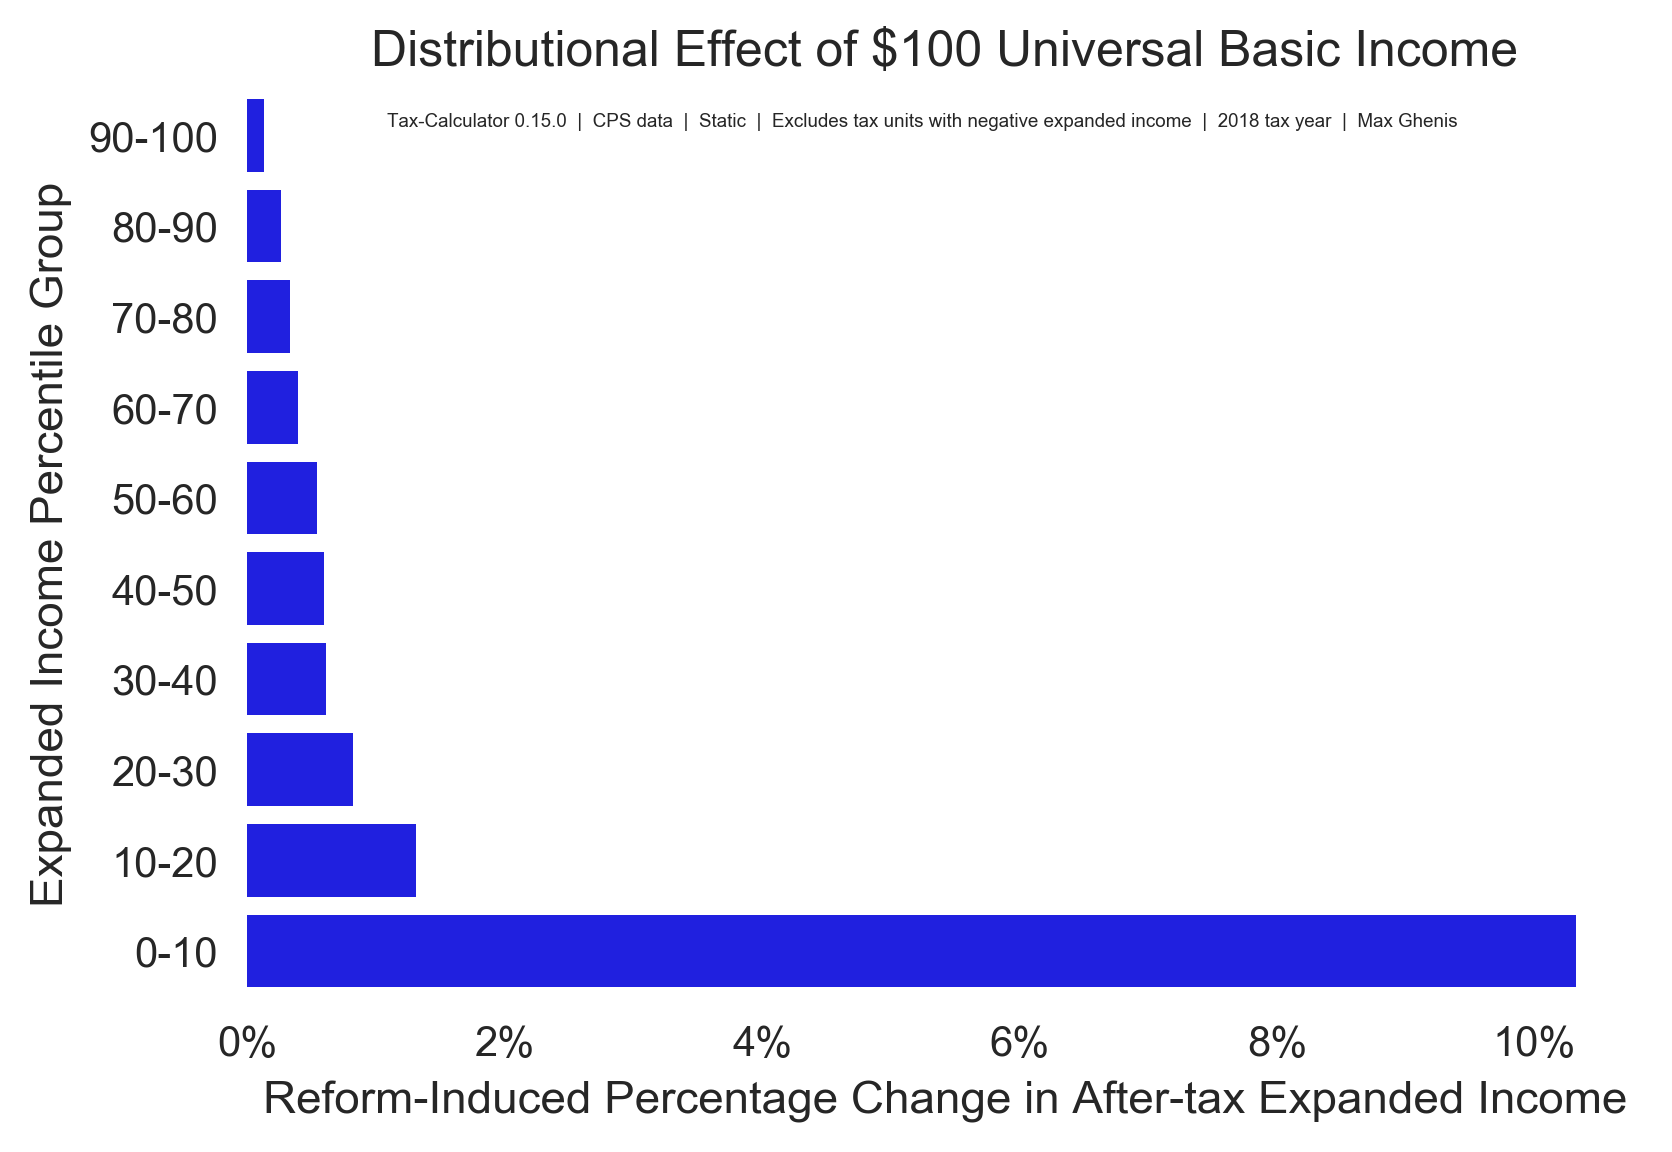

In [21]:
f, ax = plt.subplots() #figsize=(8, 8))
sns.barplot(y="expanded_income_decile_str", x="pct_change", data=decile_comparison,
            label="Total", color="b", orient='h', 
            order=list(reversed(decile_comparison['expanded_income_decile_str'])))
sns.despine(left=True, bottom=True)
vals = ax.get_xticks()
ax.set_xticklabels(['{:0.0f}%'.format(100 * x) for x in vals])
ax.set(xlabel='Reform-Induced Percentage Change in After-tax Expanded Income',
       ylabel='Expanded Income Percentile Group')
plt.title('Distributional Effect of $100 Universal Basic Income', loc='center')
# TODO: Use `suptitle` for title and `title` for the subtitle, per https://stackoverflow.com/a/4490761/1840471.
subtitle = ('Tax-Calculator 0.15.0  |  CPS data  |  Static  ' +
            '|  Excludes tax units with negative expanded income  |  2018 tax year  ' +
            '|  Max Ghenis')
plt.figtext(.5, .85, subtitle,
            fontsize=4.5, ha='center')
plt.show()